In [1]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

./index.md
./module-p8.ipynb
./data/test.csv
./data/train.csv
./data/transactions.csv
./data/oil.csv
./data/holidays_events.csv
./data/sample_submission.csv
./data/stores.csv


In [3]:
#!pip install "gluonts[mxnet,pro]"

In [4]:
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

In [5]:
df_train

id        date  store_nbr                      family     sales  \
0              0  2013-01-01          1                  AUTOMOTIVE     0.000   
1              1  2013-01-01          1                   BABY CARE     0.000   
2              2  2013-01-01          1                      BEAUTY     0.000   
3              3  2013-01-01          1                   BEVERAGES     0.000   
4              4  2013-01-01          1                       BOOKS     0.000   
...          ...         ...        ...                         ...       ...   
3000883  3000883  2017-08-15          9                     POULTRY   438.133   
3000884  3000884  2017-08-15          9              PREPARED FOODS   154.553   
3000885  3000885  2017-08-15          9                     PRODUCE  2419.729   
3000886  3000886  2017-08-15          9  SCHOOL AND OFFICE SUPPLIES   121.000   
3000887  3000887  2017-08-15          9                     SEAFOOD    16.000   

         onpromotion  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
3000883            0  
3000884            1  
3000885          148  
3000886            8  
3000887            0  

[3000888 rows x 6 columns]

In [6]:
df_train.dtypes

id               int64
date            object
store_nbr        int64
family          object
sales          float64
onpromotion      int64
dtype: object

In [7]:
df_train['sales'].sum()

1073644952.2030689

In [8]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_train['family_cat'] = le.fit_transform(df_train['family'])
le.classes_

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [9]:
df_train['date'].min()

'2013-01-01'

<AxesSubplot:xlabel='date'>

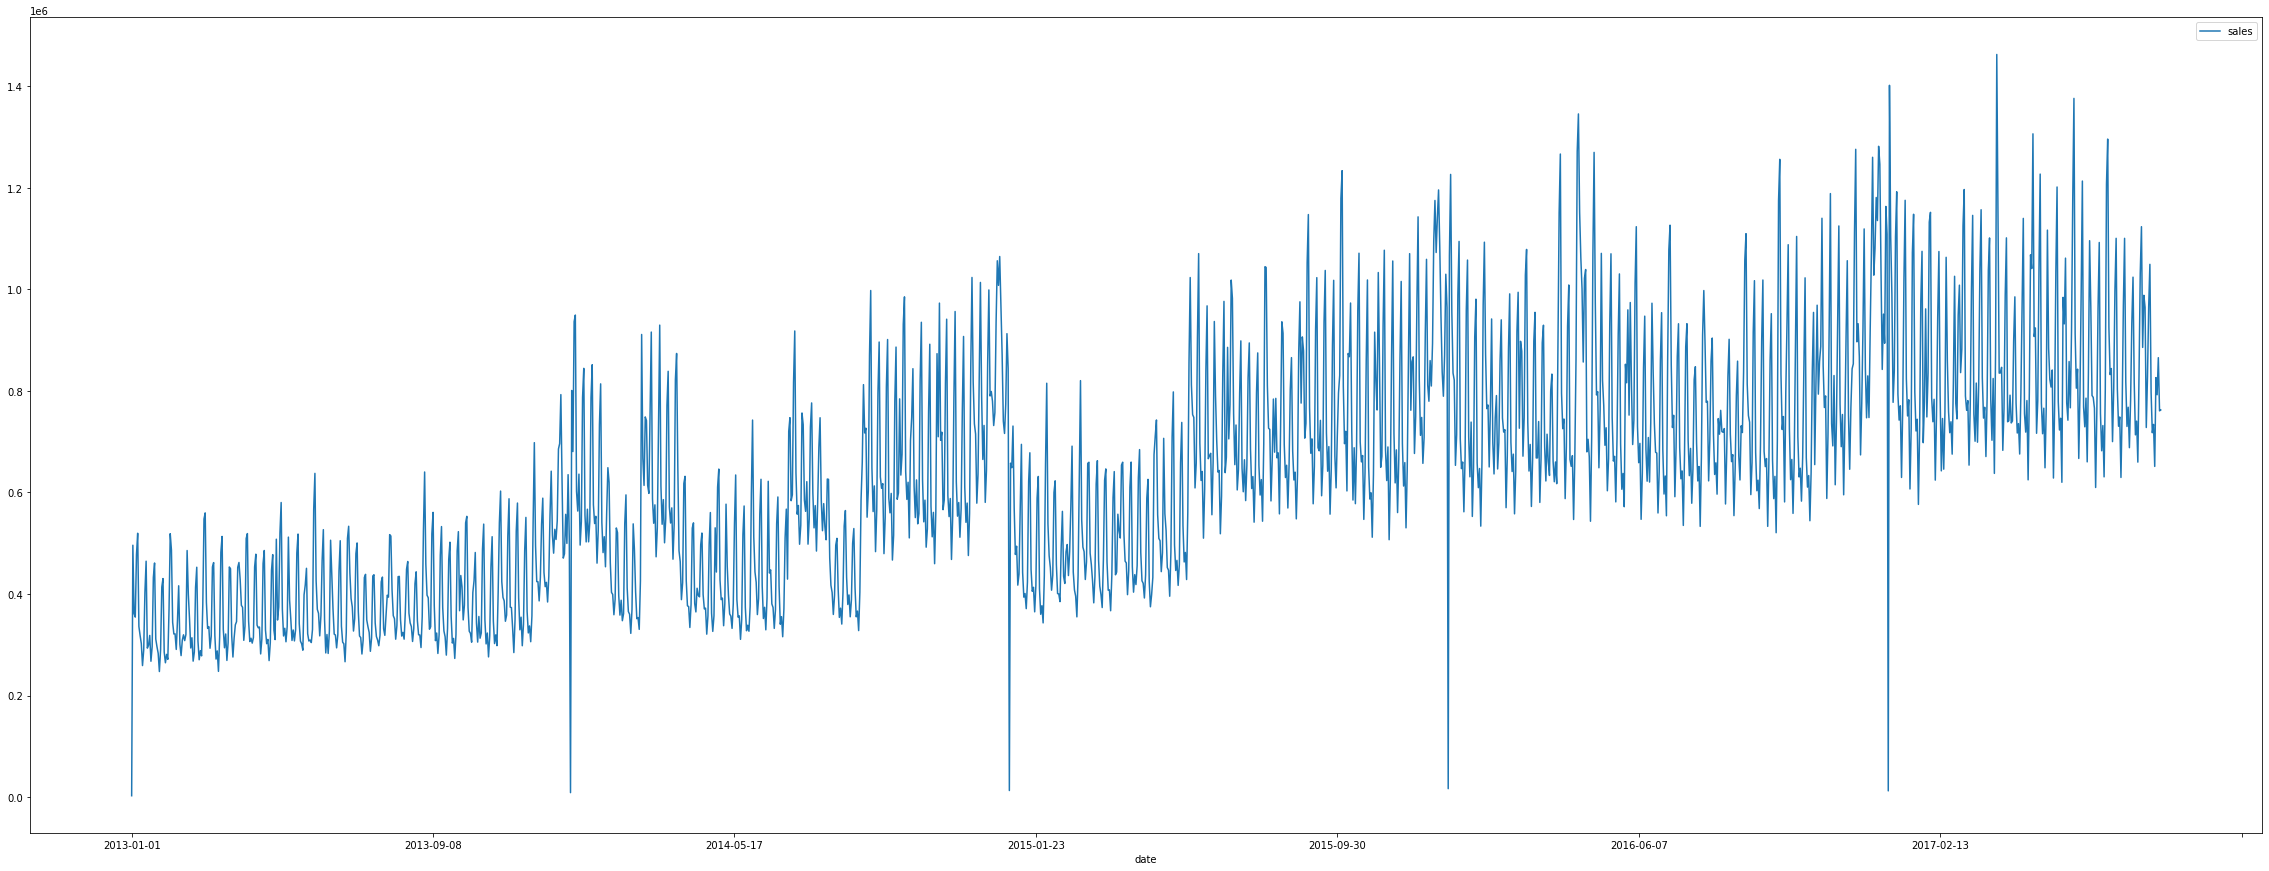

In [10]:
df_tmp = df_train.groupby('date').sum()
df_tmp.plot(y='sales', figsize = (40,15))

In [11]:
df_tmp[df_tmp['sales'] == 0]

Empty DataFrame
Columns: [id, store_nbr, sales, onpromotion, family_cat]
Index: []

In [12]:
df_test

id        date  store_nbr                      family  onpromotion
0      3000888  2017-08-16          1                  AUTOMOTIVE            0
1      3000889  2017-08-16          1                   BABY CARE            0
2      3000890  2017-08-16          1                      BEAUTY            2
3      3000891  2017-08-16          1                   BEVERAGES           20
4      3000892  2017-08-16          1                       BOOKS            0
...        ...         ...        ...                         ...          ...
28507  3029395  2017-08-31          9                     POULTRY            1
28508  3029396  2017-08-31          9              PREPARED FOODS            0
28509  3029397  2017-08-31          9                     PRODUCE            1
28510  3029398  2017-08-31          9  SCHOOL AND OFFICE SUPPLIES            9
28511  3029399  2017-08-31          9                     SEAFOOD            0

[28512 rows x 5 columns]

In [13]:
df_train.set_index('date', inplace=True)

In [14]:
df_train

id  store_nbr                      family     sales  \
date                                                                   
2013-01-01        0          1                  AUTOMOTIVE     0.000   
2013-01-01        1          1                   BABY CARE     0.000   
2013-01-01        2          1                      BEAUTY     0.000   
2013-01-01        3          1                   BEVERAGES     0.000   
2013-01-01        4          1                       BOOKS     0.000   
...             ...        ...                         ...       ...   
2017-08-15  3000883          9                     POULTRY   438.133   
2017-08-15  3000884          9              PREPARED FOODS   154.553   
2017-08-15  3000885          9                     PRODUCE  2419.729   
2017-08-15  3000886          9  SCHOOL AND OFFICE SUPPLIES   121.000   
2017-08-15  3000887          9                     SEAFOOD    16.000   

            onpromotion  family_cat  
date                                 
2013-01-01            0           0  
2013-01-01            0           1  
2013-01-01            0           2  
2013-01-01            0           3  
2013-01-01            0           4  
...                 ...         ...  
2017-08-15            0          28  
2017-08-15            1          29  
2017-08-15          148          30  
2017-08-15            8          31  
2017-08-15            0          32  

[3000888 rows x 6 columns]

### Oil

In [15]:
df_oil = pd.read_csv('data/oil.csv')
df_oil.set_index('date', inplace=True)

<AxesSubplot:xlabel='date'>

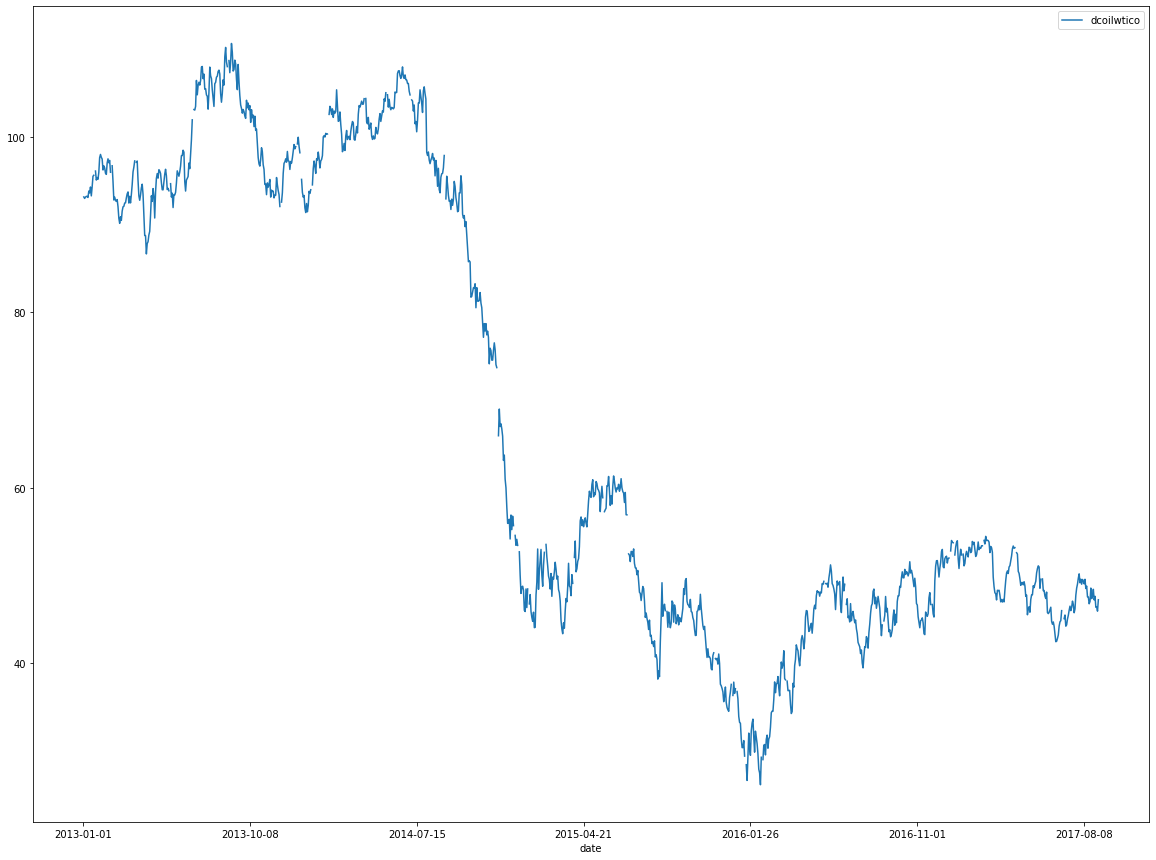

In [16]:
df_oil.plot(figsize=(20,15))

### Stores

In [17]:
df_stores = pd.read_csv('data/stores.csv')
df_stores.set_index('store_nbr', inplace=True)
df_stores.head()

city                           state type  cluster
store_nbr                                                             
1                  Quito                       Pichincha    D       13
2                  Quito                       Pichincha    D       13
3                  Quito                       Pichincha    D        8
4                  Quito                       Pichincha    D        9
5          Santo Domingo  Santo Domingo de los Tsachilas    D        4

In [18]:
df_train = df_train.join(df_stores, on='store_nbr')
# df_train.head()

In [19]:
df_train.dtypes

id               int64
store_nbr        int64
family          object
sales          float64
onpromotion      int64
family_cat       int64
city            object
state           object
type            object
cluster          int64
dtype: object

some clusters are more predominant than others

<AxesSubplot:ylabel='sales'>

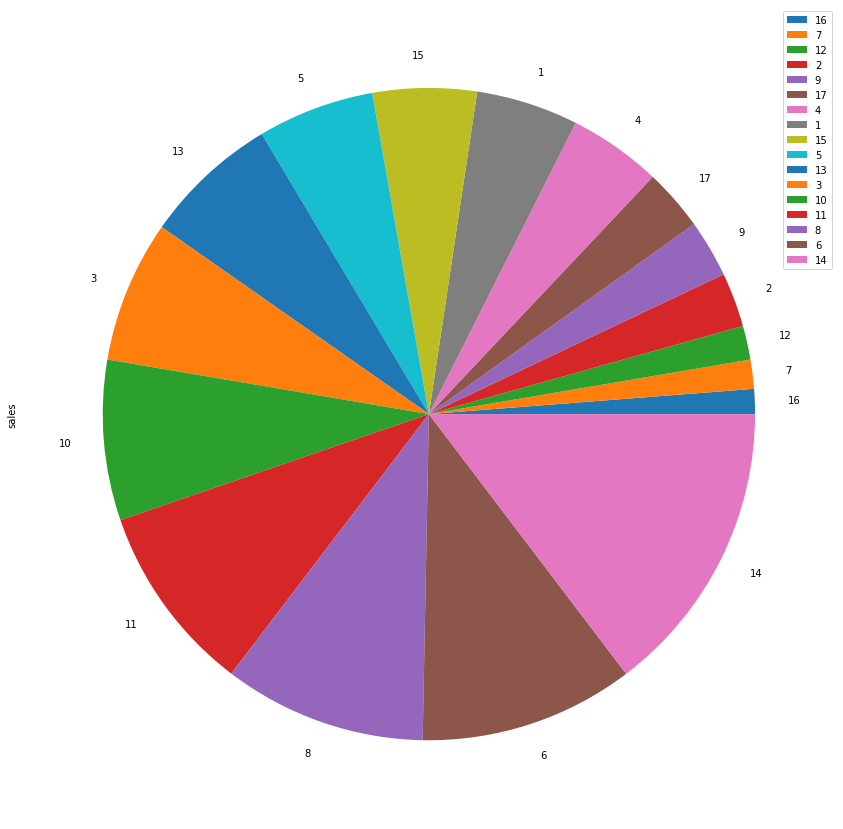

In [20]:
df_train.groupby('cluster').sum().sort_values(by='sales').plot.pie(y='sales', figsize=(15,15), xlabel='cluster')


### Holidays Events

In [21]:
df_holidays = pd.read_csv('data/holidays_events.csv')

In [22]:
df_holidays

date        type    locale locale_name  \
0    2012-03-02     Holiday     Local       Manta   
1    2012-04-01     Holiday  Regional    Cotopaxi   
2    2012-04-12     Holiday     Local      Cuenca   
3    2012-04-14     Holiday     Local    Libertad   
4    2012-04-21     Holiday     Local    Riobamba   
..          ...         ...       ...         ...   
345  2017-12-22  Additional  National     Ecuador   
346  2017-12-23  Additional  National     Ecuador   
347  2017-12-24  Additional  National     Ecuador   
348  2017-12-25     Holiday  National     Ecuador   
349  2017-12-26  Additional  National     Ecuador   

                       description  transferred  
0               Fundacion de Manta        False  
1    Provincializacion de Cotopaxi        False  
2              Fundacion de Cuenca        False  
3        Cantonizacion de Libertad        False  
4        Cantonizacion de Riobamba        False  
..                             ...          ...  
345                      Navidad-3        False  
346                      Navidad-2        False  
347                      Navidad-1        False  
348                        Navidad        False  
349                      Navidad+1        False  

[350 rows x 6 columns]

<AxesSubplot:xlabel='date'>

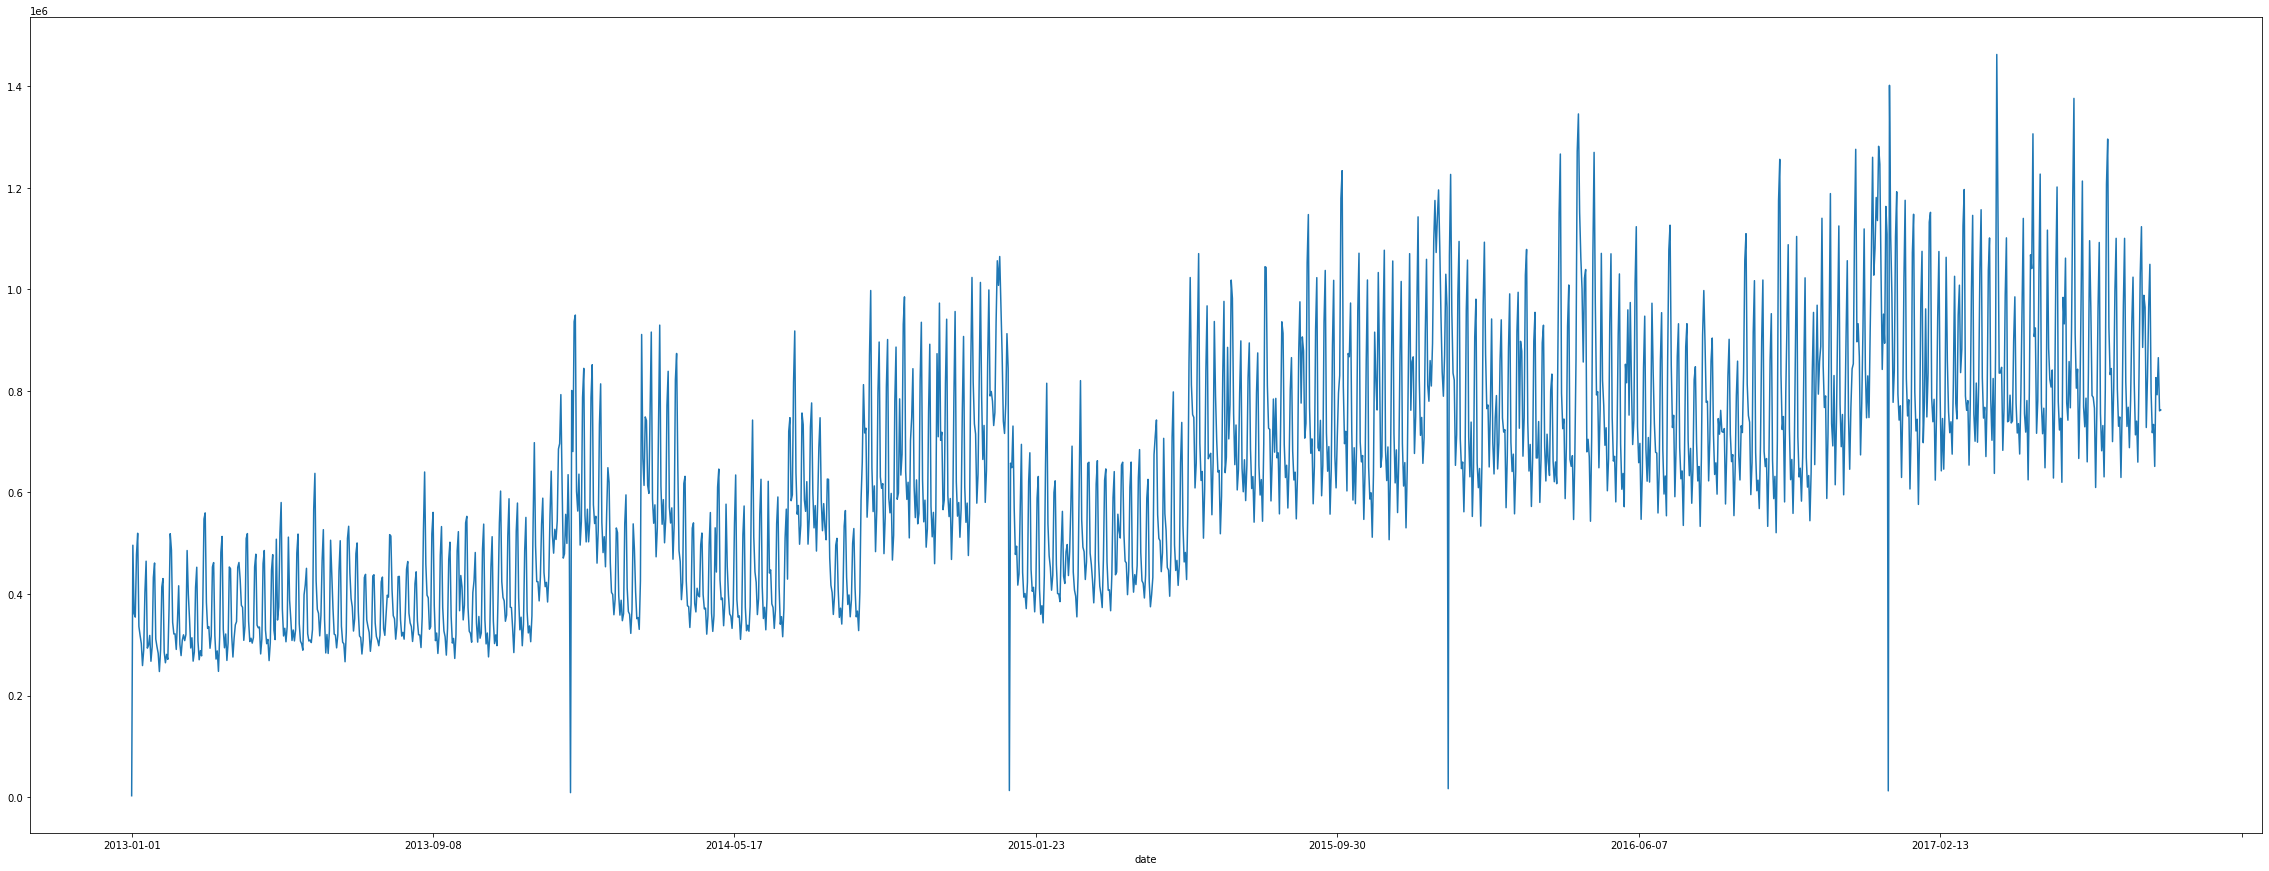

In [23]:
df_train['sales'].groupby(by='date').sum().plot(figsize=(40,15))

<AxesSubplot:xlabel='date'>

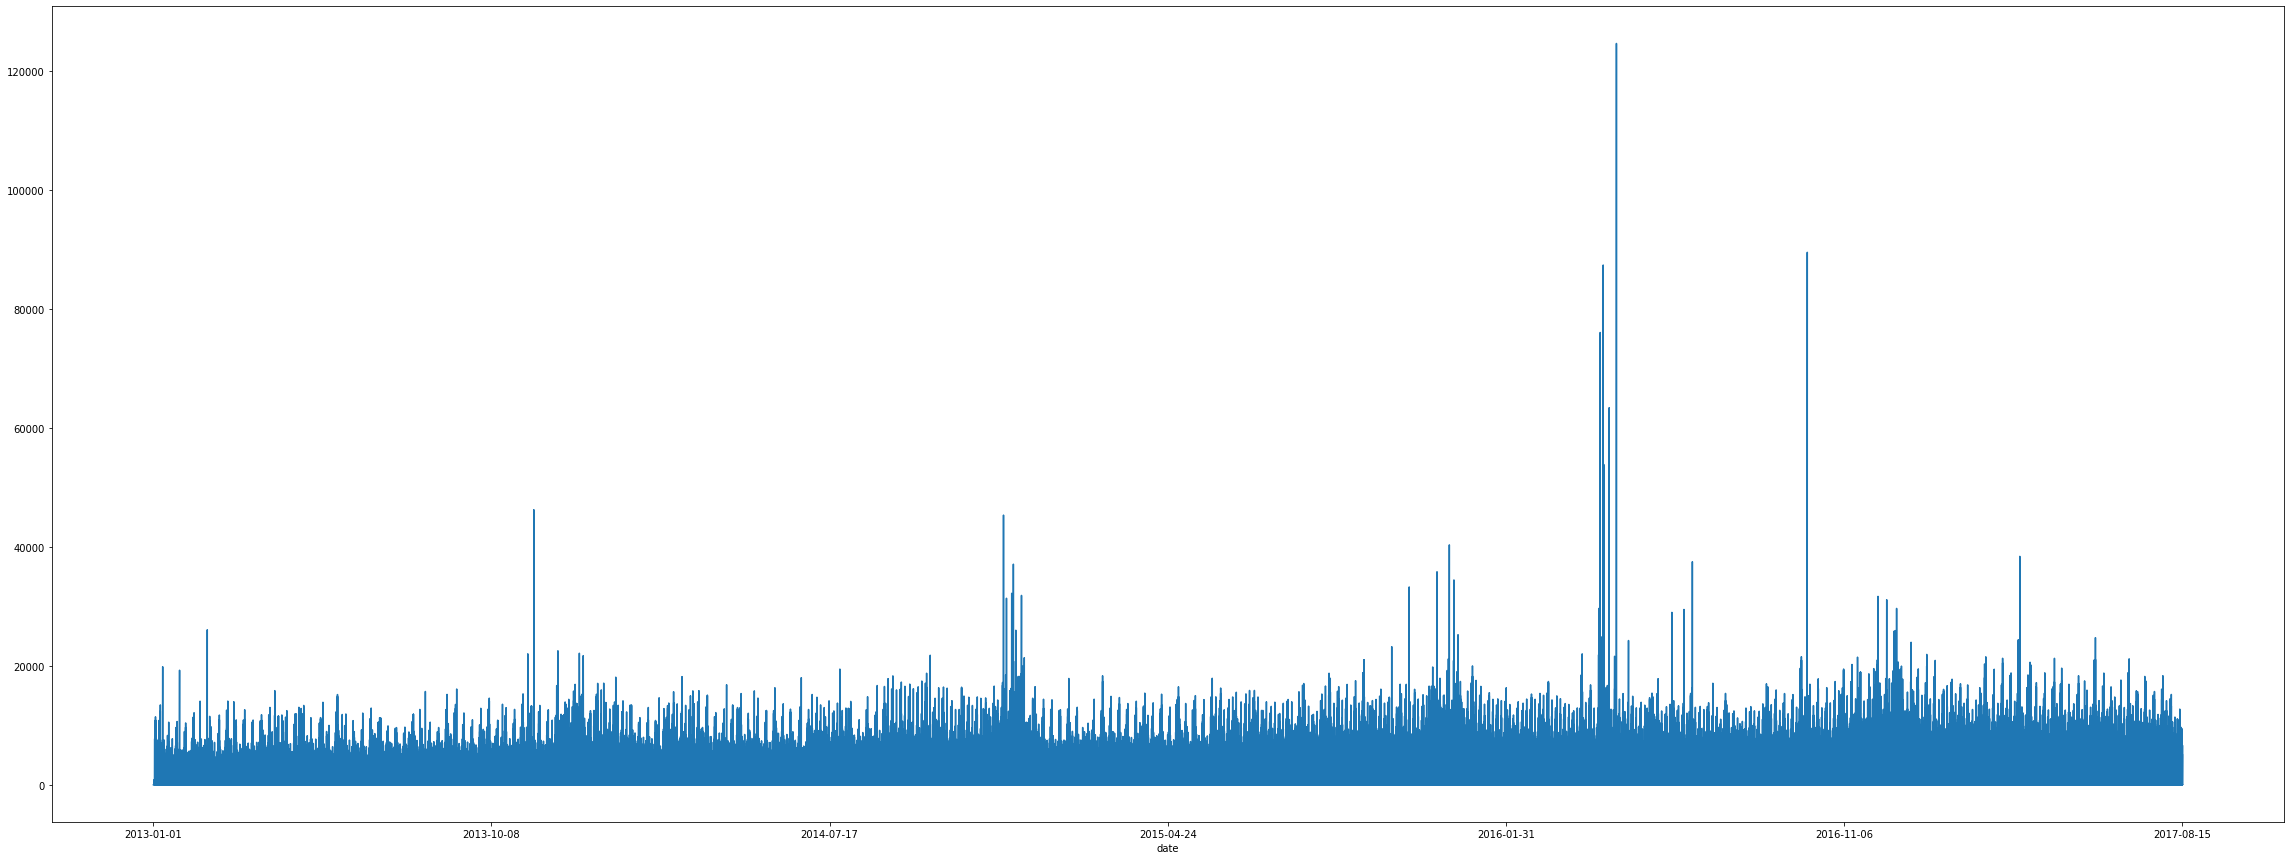

In [24]:
df_train['sales'].plot(figsize=(40,15))

In [25]:
df_train.shape

(3000888, 10)

due to the earthquake on April 2016, there are exceptional sales, so we can remove these points
let's consider a maximum of 5000

In [26]:
df_train = df_train[df_train['sales'] < 6000.0]

In [27]:
df_train.shape

(2975693, 10)

<AxesSubplot:xlabel='date'>

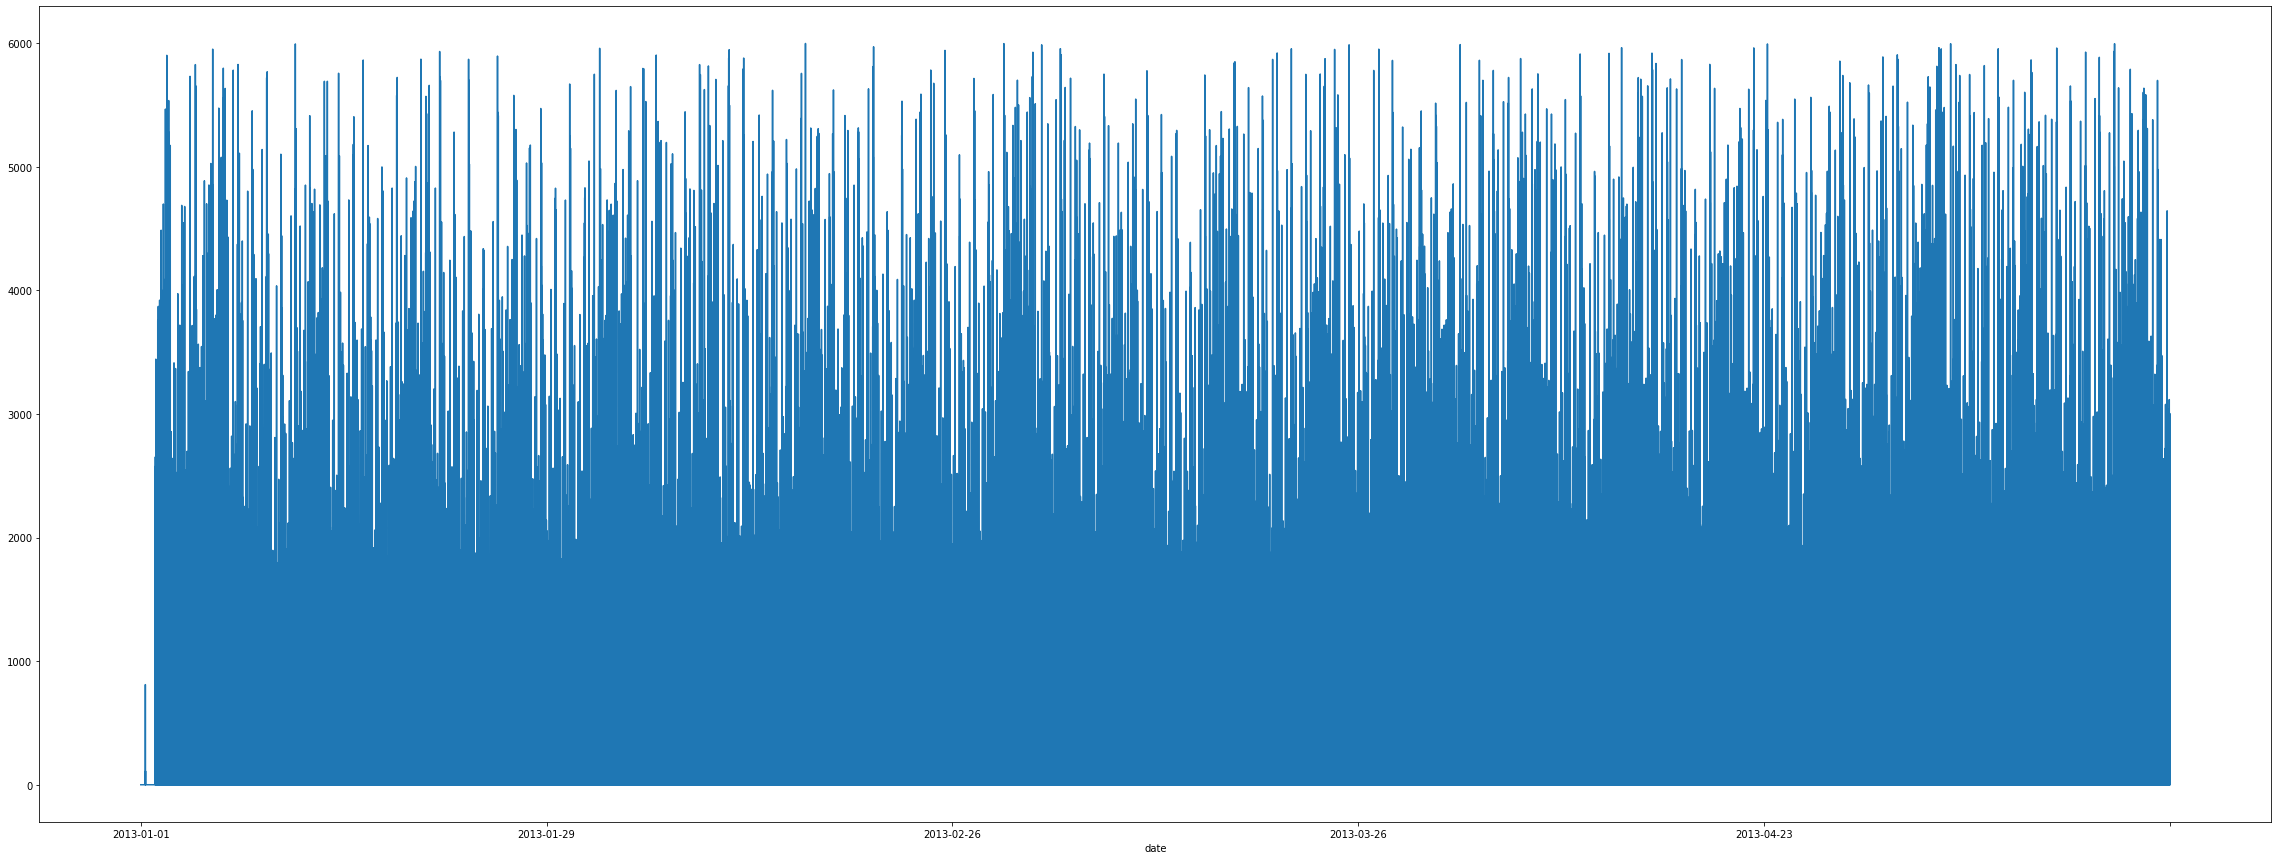

In [28]:
df_train['sales'][:250000].plot(figsize=(40,15))

In [ ]:
def dropOutlierIQR(df, col):
    Q1 = df[col].quantile(0.25)
    # print(Q1)
    Q3 = df[col].quantile(0.75)
    # print(Q3)
    IQR = Q3 - Q1
    # print(IQR)
    df[col] = df[col][df[col].between((Q1 - 1.5 * IQR), (Q3 + 1.5 * IQR))]

## GluonTS

In [32]:
from gluonts.dataset.common import ListDataset
from gluonts.model.deepar import DeepAREstimator
from gluonts.model.transformer import TransformerEstimator
from gluonts.model.lstnet import LSTNetEstimator

from gluonts.mx import Trainer
from gluonts.dataset.util import to_pandas
from gluonts.dataset.pandas import PandasDataset
from gluonts.mx.distribution.student_t import StudentTOutput

freq = "D"
start = pd.Period("2013-01-01", freq=freq)
prediction_length = 28000 # predict this many points
context_length = 2000 # train on this number of points


train_ds = ListDataset(
    [{"start": df_train.index[0], "target": df_train.sales[:-prediction_length]}],
    freq=freq
)

test_ds = ListDataset(
    [{"start": df_train.index[0], "target": df_train.sales[:]}],
    freq=freq
)



In [38]:
estimator = LSTNetEstimator(
    prediction_length=prediction_length,
    context_length=context_length,
    num_series=1,
    skip_size=1,
    ar_window=100,
    channels=1,
    trainer=Trainer(
        epochs=5,
        learning_rate=1e-3,
        num_batches_per_epoch=10,
        patience=2
    )
)

In [39]:

predictor = estimator.train(training_data=train_ds)

  0%|                                                                                                                            | 0/10 [00:00<?, ?it/s]


GluonTSDataError: Input for field "target" does not have the requireddimension (field: target, ndim observed: 1, expected ndim: 2)

In [ ]:
from gluonts.evaluation import Evaluator
from gluonts.evaluation import make_evaluation_predictions
import matplotlib.pyplot as plt

def make_predictions(predictor, ds, num_samples=100):
    forecast_it, ts_it = make_evaluation_predictions(
        dataset=ds,  # test dataset
        predictor=predictor,  # predictor
        num_samples=num_samples,  # number of sample paths we want for evaluation
    )
    return list(forecast_it), list(ts_it)

def plot_prob_forecasts(ts_entry, forecast_entry):
    plot_length = context_length + prediction_length
    prediction_intervals = (50.0, 90.0)
    legend = ["observations", "median prediction"] + [ f"{k}% prediction interval" for k in prediction_intervals][::-1]

    fig, ax = plt.subplots(1, 1, figsize=(10, 7))
    ts_entry[-plot_length:].plot(ax=ax)  # plot the time series
    forecast_entry.plot(prediction_intervals=prediction_intervals, color="cadetblue")
    plt.axvline(forecast_entry.start_date, color="g", lw=1) #end of train dataset
    plt.grid(which="major")
    plt.legend(legend, loc="upper left")
    plt.show()

def gluonts_metrics(tss, forecasts):
    evaluator = Evaluator(quantiles=[0.1, 0.5, 0.9])
    agg_metrics, item_metrics = evaluator(tss, forecasts)

    print(json.dumps(agg_metrics, indent=4))

In [ ]:

(forecasts, tss) = make_predictions(predictor, train_ds, prediction_length)
forecasts
tss
plot_prob_forecasts(tss[0], forecasts[0])
# gluonts_metrics(tss, forecasts)

## Prophet

In [43]:
from prophet import Prophet

m = Prophet()
df_train['ds'] = df_train.index
df_train['y'] = df_train['sales']

df_train

id  store_nbr                      family     sales  \
date                                                                   
2013-01-01        0          1                  AUTOMOTIVE     0.000   
2013-01-01        1          1                   BABY CARE     0.000   
2013-01-01        2          1                      BEAUTY     0.000   
2013-01-01        3          1                   BEVERAGES     0.000   
2013-01-01        4          1                       BOOKS     0.000   
...             ...        ...                         ...       ...   
2017-08-15  3000883          9                     POULTRY   438.133   
2017-08-15  3000884          9              PREPARED FOODS   154.553   
2017-08-15  3000885          9                     PRODUCE  2419.729   
2017-08-15  3000886          9  SCHOOL AND OFFICE SUPPLIES   121.000   
2017-08-15  3000887          9                     SEAFOOD    16.000   

            onpromotion  family_cat   city      state type  cluster  \
date                                                                  
2013-01-01            0           0  Quito  Pichincha    D       13   
2013-01-01            0           1  Quito  Pichincha    D       13   
2013-01-01            0           2  Quito  Pichincha    D       13   
2013-01-01            0           3  Quito  Pichincha    D       13   
2013-01-01            0           4  Quito  Pichincha    D       13   
...                 ...         ...    ...        ...  ...      ...   
2017-08-15            0          28  Quito  Pichincha    B        6   
2017-08-15            1          29  Quito  Pichincha    B        6   
2017-08-15          148          30  Quito  Pichincha    B        6   
2017-08-15            8          31  Quito  Pichincha    B        6   
2017-08-15            0          32  Quito  Pichincha    B        6   

                    ds         y  
date                              
2013-01-01  2013-01-01     0.000  
2013-01-01  2013-01-01     0.000  
2013-01-01  2013-01-01     0.000  
2013-01-01  2013-01-01     0.000  
2013-01-01  2013-01-01     0.000  
...                ...       ...  
2017-08-15  2017-08-15   438.133  
2017-08-15  2017-08-15   154.553  
2017-08-15  2017-08-15  2419.729  
2017-08-15  2017-08-15   121.000  
2017-08-15  2017-08-15    16.000  

[2975693 rows x 12 columns]

In [44]:
m.fit(df_train[:100000])

23:40:50 - cmdstanpy - INFO - Chain [1] start processing
23:41:24 - cmdstanpy - INFO - Chain [1] done processing


In [45]:
future = m.make_future_dataframe(periods=365)
future.tail()

ds
417 2014-02-22
418 2014-02-23
419 2014-02-24
420 2014-02-25
421 2014-02-26

In [46]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


ds        yhat    yhat_lower    yhat_upper
417 2014-02-22  192.787313 -26058.585117  25664.271928
418 2014-02-23  185.535416 -26323.661056  25562.339309
419 2014-02-24  148.592637 -26420.454996  25745.178494
420 2014-02-25  132.889263 -26394.724497  25816.014153
421 2014-02-26  154.789967 -26616.664614  25944.459091

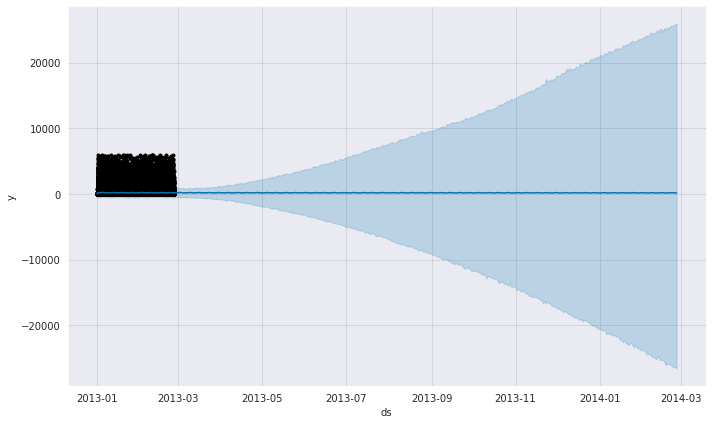

In [47]:
fig1 = m.plot(forecast)


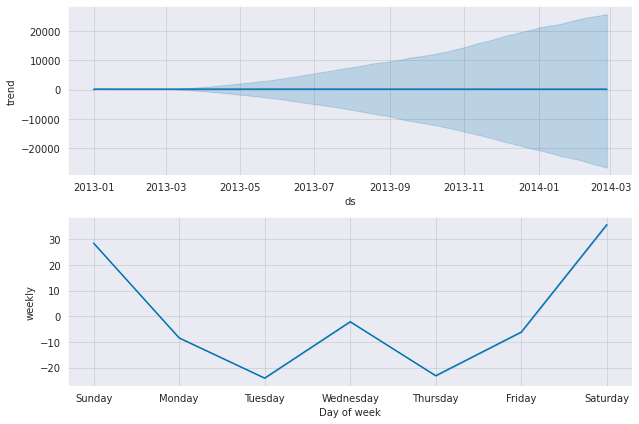

In [48]:
fig2 = m.plot_components(forecast)


In [51]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [52]:
plot_components_plotly(m, forecast)
